In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import matplotlib as mpl
import nltk
%matplotlib inline

In [2]:
import gc

In [3]:
gc.collect()

18

In [4]:
import glob

In [5]:
glob.glob('data/*.pkl')

['data\\newsdf.pkl',
 'data\\train_xy.pkl',
 'data\\d2vdf.pkl',
 'data\\dfvec.pkl',
 'data\\dvec1.pkl',
 'data\\newsdf_03_19.pkl',
 'data\\ndf.pkl',
 'data\\ndf_tok.pkl',
 'data\\busil_idx.pkl',
 'data\\ndf_tit_vec.pkl',
 'data\\ndf_txt_vec.pkl',
 'data\\ndf_tit_vec1.pkl',
 'data\\ndf_txt_vec1.pkl',
 'data\\ndf_bstag.pkl']

In [9]:
ndf = pd.read_pickle('data/ndf_txt_vec1.pkl').reset_index()

In [10]:
ndf['date'] = pd.to_datetime(ndf.ym,format='%Y%m')

In [11]:
ndf.columns

Index(['ym', 'qry', 'title', 'text', 'tok_tit', 'tok_txt', 'tag_tit',
       'tag_txt', 'dx1', 'dx2', 'dx3', 'dx4', 'dx5', 'dx6', 'dx7', 'dx8',
       'dx9', 'dx10', 'cycle', 'tcycle', '가계소득지표', '가계소비지표', '차입수준지표', 'date'],
      dtype='object')

In [38]:
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 12

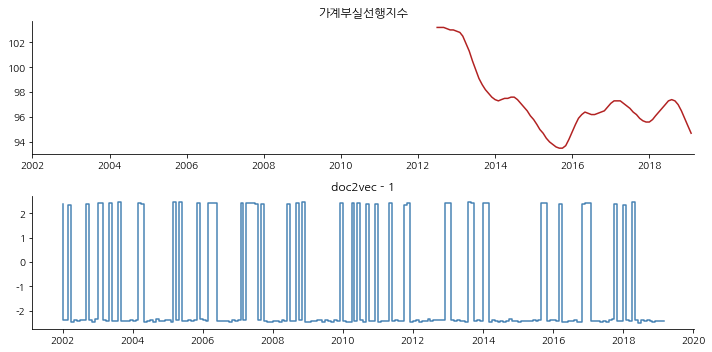

In [48]:
fig, ax = plt.subplots(2,1,figsize=(10,5))
plt.title('documentID: 년월')    
ax[0].plot_date('date','tcycle','-',color='firebrick',data=ndf,label='가계부실선행지수')
ax[0].set_title('가계부실선행지수')
ax[0].set_xlim(['2002-01-01','2019-03-01'])
ax[1].plot_date('date','dx1','-',color='steelblue',data=ndf,label='doc2vec-1',drawstyle='steps')
ax[1].set_title('doc2vec - 1')
for i in range(2):
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
plt.tight_layout()

### doc2vec PCA

In [49]:
from sklearn.decomposition import PCA

In [50]:
pca1 = PCA(n_components=5)

In [51]:
ndf.columns

Index(['ym', 'qry', 'title', 'text', 'tok_tit', 'tok_txt', 'tag_tit',
       'tag_txt', 'dx1', 'dx2', 'dx3', 'dx4', 'dx5', 'dx6', 'dx7', 'dx8',
       'dx9', 'dx10', 'cycle', 'tcycle', '가계소득지표', '가계소비지표', '차입수준지표', 'date'],
      dtype='object')

In [70]:
x_low = pca1.fit_transform(ndf[[col for col in ndf.columns if col.find('dx')>=0]])

In [73]:
x2 = pca1.inverse_transform(x_low)

In [79]:
pca1.explained_variance_

array([1.78425646e+01, 1.18353198e-03, 1.03009459e-03, 9.52403489e-04,
       8.86904385e-04])

In [83]:
np.round(pca1.explained_variance_ratio_,3)

array([1., 0., 0., 0., 0.])

### **가계부채+연체 기사검색**

In [2]:
from konlpy.tag import Okt
okt = Okt()

In [3]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [4]:
from nvsch import *

In [86]:
b_rng = pd.date_range('2002-01-01','2019-04-01',freq='MS').strftime('%Y.%m.%d').tolist()[:-1]
e_rng = pd.date_range('2002-01-01','2019-04-01',freq='M').strftime('%Y.%m.%d').tolist()

In [87]:
%%time
dfs = []
for beg, end in zip(b_rng,e_rng):
    s = time.time()
    dfs.append(naver_search_d('가계부채+연체',beg,end,pages=1))
    e = time.time() - s
    print('{}~{} done, {} elapsed'.format(beg,end,time.strftime('%H:%M:%S',time.gmtime(e))))
newsdf = pd.concat(dfs,axis=0)    
# Wall time: 1h 12min 22s
newsdf.to_pickle('data/newsdf_가계부채_연체_03_19.pkl')

가계부채+연체 2002 search done, 00:00:13 elapsed
2002.01.01~2002.01.31 done, 00:00:13 elapsed
가계부채+연체 2002 search done, 00:00:13 elapsed
2002.02.01~2002.02.28 done, 00:00:13 elapsed
가계부채+연체 2002 search done, 00:00:21 elapsed
2002.03.01~2002.03.31 done, 00:00:21 elapsed
가계부채+연체 2002 search done, 00:00:19 elapsed
2002.04.01~2002.04.30 done, 00:00:19 elapsed
가계부채+연체 2002 search done, 00:00:18 elapsed
2002.05.01~2002.05.31 done, 00:00:18 elapsed
가계부채+연체 2002 search done, 00:00:03 elapsed
2002.06.01~2002.06.30 done, 00:00:03 elapsed
가계부채+연체 2002 search done, 00:00:02 elapsed
2002.07.01~2002.07.31 done, 00:00:02 elapsed
가계부채+연체 2002 search done, 00:00:05 elapsed
2002.08.01~2002.08.31 done, 00:00:05 elapsed
가계부채+연체 2002 search done, 00:00:21 elapsed
2002.09.01~2002.09.30 done, 00:00:21 elapsed
가계부채+연체 2002 search done, 00:00:18 elapsed
2002.10.01~2002.10.31 done, 00:00:18 elapsed
가계부채+연체 2002 search done, 00:00:17 elapsed
2002.11.01~2002.11.30 done, 00:00:17 elapsed
가계부채+연체 2002 search done, 00:00:

In [88]:
newsdf.head()

,ym,qry,date,title,text
0,200201,가계부채+연체,None,"[금융] ""가계부채 급격한 증가세..위험 징후""",머니투데이\n\n[머니투데이] 한국금융연구원은 31일 가계부채의 급격한 증가나 규모...
1,200201,가계부채+연체,None,"""가계부채 과도한 증가는 `금융불안' 초래""<금융연>",`신용카드 부실이 도화선'(서울=연합뉴스) 한승호기자 = 가계부채의 과도한 증가는 ...
2,200201,가계부채+연체,None,“가계부채 300조 초과…금융불안 요인”,가계부채의 과도한 증가는 금융시장의 불안요인으로 작용할 수 있다는 주장이 나왔다.최...
3,200201,가계부채+연체,None,가계부채 올해 400조 돌파 예상 .. 한국금융연구원,최근 급증하고 있는 가계부채 규모는 아직 우려할 만한 수준은 아니라고 한국금융연구원...
4,200201,가계부채+연체,None,[은행 가계대출 왜 줄이나] 개인파산 급증땐 경기회복 찬물,소비거품인가 아니면 경기가 바닥을 치면서 나타나는 일시적 현상인가.\n\n\n\n최...


In [83]:
newsdf = pd.read_pickle('data/newsdf_가계부채_연체_03_19.pkl')

**월별로 기사합치기: newsdf -> ndf**

In [6]:
ndf = newsdf.groupby(['ym','qry'])['text'].apply(lambda x: x.sum()).to_frame().reset_index()

In [7]:
ndf.head()

,ym,qry,text
0,200201,가계부채+연체,머니투데이\n\n[머니투데이] 한국금융연구원은 31일 가계부채의 급격한 증가나 규모...
1,200202,가계부채+연체,PICK 안내 해당 언론사가 주요기사로\n\n직접 선정한 기사입니다. 언론사 편집판...
2,200203,가계부채+연체,이번 호황기에 가계대출규모가 적정수준을 넘어설 경우 다음 침체기엔 가계부실화가 더욱...
3,200204,가계부채+연체,지난 3월중 은행의 가계대출은 7조6천9백50억원이 늘어나 최근의 급등세를 이어갔다...
4,200205,가계부채+연체,카드 빚을 못갚아 발생하는 신용불량자가 해마다 급증하고 있다.금융감독원에 따르면 L...


**Tokenize : 명사,형용사,부사만**

In [8]:
pos_list = ['Adjective','Adverb','Noun']
tok_p = lambda doc: ['/'.join(t) for t in okt.pos(doc) if t[1] in pos_list] # okt.pos(doc): (사스, Noun) => 사스/Noun

In [9]:
%%time
ndf['tok_txt'] = ndf.text.apply(tok_p) # tok_txt : tokenize된 text

Wall time: 3min 12s


**Doc2Vec**

In [10]:
import multiprocessing
cores = multiprocessing.cpu_count()
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from sklearn import utils
cores

4

In [11]:
tagdoc = lambda txt, ym: [TaggedDocument(words=txt,tags=[ym])]

In [12]:
tag_txt = ndf.apply(lambda x: tagdoc(x.tok_txt,x.ym),axis=1) # tag_txt : doc2vec 입력용으로 변환, 기사별

In [13]:
tag_txt = [t for x in tag_txt for t in x] # tag_txt : 모델개발용으로 하나로 합침

In [14]:
%%time
# 토큰업로드
max_epochs = 30
vec_size = 10
alpha = 0.025

model_dbow_txt = Doc2Vec(dm=0,
                     vector_size=vec_size,
                     alpha=alpha, 
                     min_alpha=0.00025,
                     min_count=1,
                     workers=cores)
model_dbow_txt.build_vocab(tag_txt)
# 모델피팅
for epoch in range(30):
    model_dbow_txt.train(utils.shuffle([x for x in tqdm(tag_txt)]),
                    total_examples=model_dbow_txt.corpus_count,
                    epochs=10)
    model_dbow_txt.alpha -= 0.002
    model_dbow_txt.min_alpha = model_dbow_txt.alpha

In [15]:
# 벡터라이징
dvec1 = list(map(lambda x: model_dbow_txt.infer_vector(x), ndf.tok_txt))
cname = ['dx'+str(i) for i in np.arange(1,vec_size+1)]
dvec1 = pd.DataFrame(dvec1,columns = cname)
# Wall time: 1min 25s

In [16]:
dvec1.head()

,dx1,dx2,dx3,dx4,dx5,dx6,dx7,dx8,dx9,dx10
0,1.021819,2.056621,0.610365,-0.123577,1.240562,1.890712,-4.539706,0.102816,-0.482126,-0.702655
1,1.094471,2.091204,0.584936,-0.119116,1.213648,1.893989,-4.499334,0.073955,-0.389915,-0.715534
2,0.956285,1.958779,0.546500,-0.096701,1.453336,1.928105,-4.511371,0.020485,-0.334370,-0.742639
3,1.247508,1.981809,0.610039,-0.201786,1.270034,1.793405,-4.556437,0.018131,-0.416814,-0.734173
4,0.913071,1.980789,0.606029,-0.234927,1.277310,1.854718,-4.631801,0.099314,-0.412097,-0.798775


In [56]:
bidx = pd.read_pickle('data/busil_idx.pkl')
bidx.ym = bidx.ym.astype(str)

In [59]:
ndf2 = pd.concat([ndf,dvec1],axis=1)

In [60]:
ndf2 = ndf2.merge(bidx,how='left',left_on='ym',right_on='ym')

In [63]:
ndf2['date'] = pd.to_datetime(ndf2.ym, format='%Y%m')

In [64]:
ndf2.head()

,ym,qry,text,tok_txt,dx1,dx2,dx3,dx4,dx5,dx6,dx7,dx8,dx9,dx10,cycle,tcycle,가계소득지표,가계소비지표,차입수준지표,date
0,200201,가계부채+연체,머니투데이\n\n[머니투데이] 한국금융연구원은 31일 가계부채의 급격한 증가나 규모...,"[머니투데이/Noun, 머니투데이/Noun, 한국/Noun, 금융/Noun, 연구원...",1.021819,2.056621,0.610365,-0.123577,1.240562,1.890712,-4.539706,0.102816,-0.482126,-0.702655,NaN,NaN,NaN,NaN,NaN,2002-01-01
1,200202,가계부채+연체,PICK 안내 해당 언론사가 주요기사로\n\n직접 선정한 기사입니다. 언론사 편집판...,"[안내/Noun, 해당/Noun, 언론사/Noun, 기사/Noun, 직접/Noun,...",1.094471,2.091204,0.584936,-0.119116,1.213648,1.893989,-4.499334,0.073955,-0.389915,-0.715534,NaN,NaN,NaN,NaN,NaN,2002-02-01
2,200203,가계부채+연체,이번 호황기에 가계대출규모가 적정수준을 넘어설 경우 다음 침체기엔 가계부실화가 더욱...,"[이번/Noun, 호황/Noun, 기/Noun, 가계/Noun, 대출/Noun, 규...",0.956285,1.958779,0.546500,-0.096701,1.453336,1.928105,-4.511371,0.020485,-0.334370,-0.742639,NaN,NaN,NaN,NaN,NaN,2002-03-01
3,200204,가계부채+연체,지난 3월중 은행의 가계대출은 7조6천9백50억원이 늘어나 최근의 급등세를 이어갔다...,"[지난/Noun, 은행/Noun, 가계/Noun, 대출/Noun, 백/Noun, 최...",1.247508,1.981809,0.610039,-0.201786,1.270034,1.793405,-4.556437,0.018131,-0.416814,-0.734173,NaN,NaN,NaN,NaN,NaN,2002-04-01
4,200205,가계부채+연체,카드 빚을 못갚아 발생하는 신용불량자가 해마다 급증하고 있다.금융감독원에 따르면 L...,"[카드/Noun, 빚/Noun, 발생/Noun, 신용/Noun, 불량/Noun, 해...",0.913071,1.980789,0.606029,-0.234927,1.277310,1.854718,-4.631801,0.099314,-0.412097,-0.798775,NaN,NaN,NaN,NaN,NaN,2002-05-01


In [81]:
ndf2.to_pickle('data/ndf2.pkl')

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

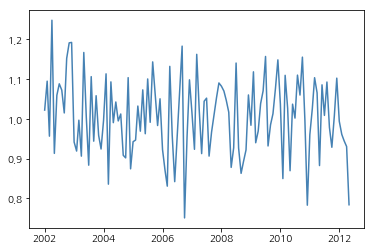

In [79]:
plt.plot_date('date','dx1','-',color='steelblue',data=ndf2)